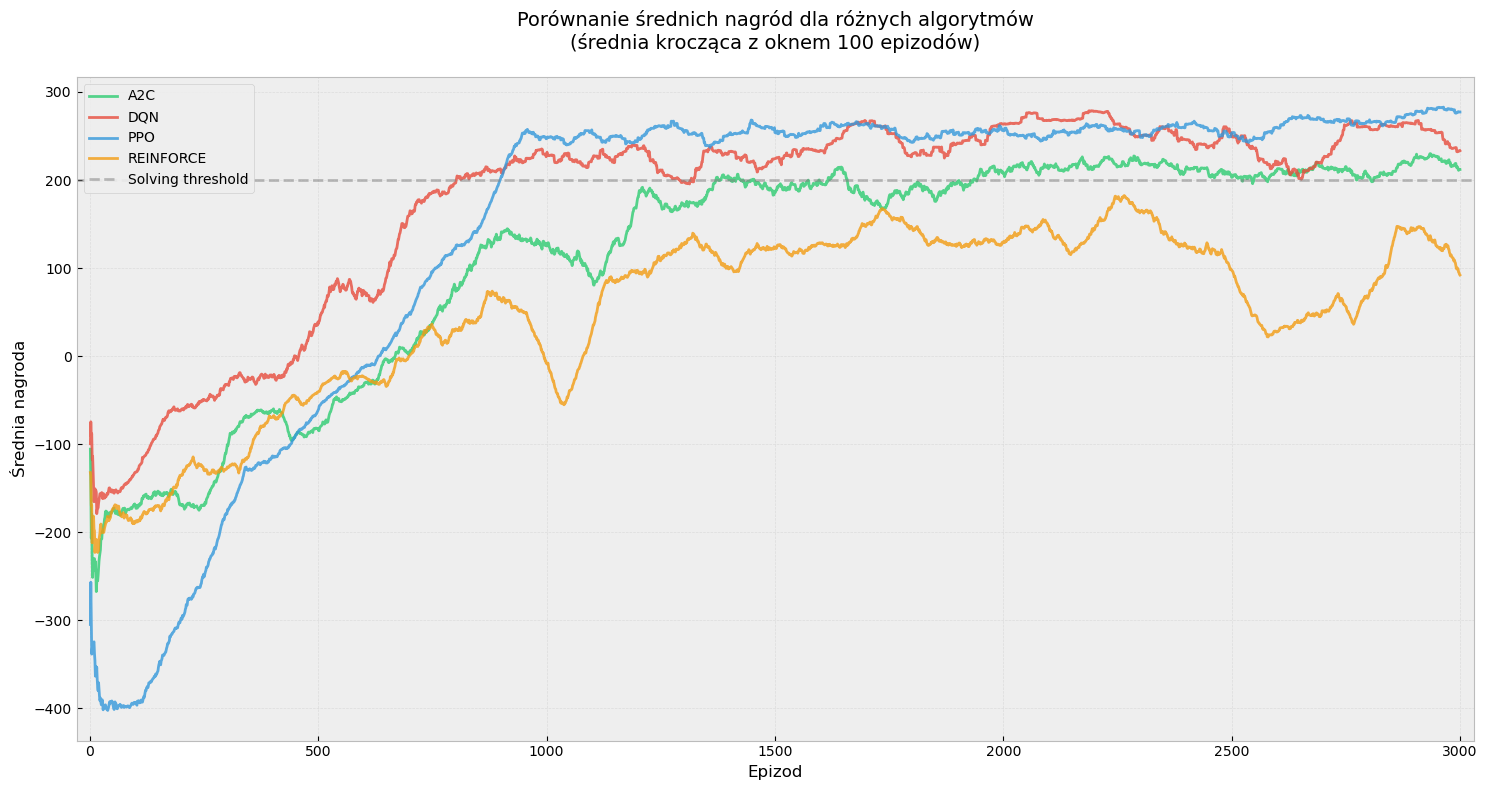

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

a2c_data = pd.read_csv('results/a2c_training_rewards.csv')
dqn_data = pd.read_csv('results/dqn_training_rewards.csv')
ppo_data = pd.read_csv('results/ppo_training_rewards.csv')
reinforce_data = pd.read_csv('results/reinforce_training_rewards.csv')

# Oblicz średnią kroczącą dla REINFORCE do dodania w kodzei z algorytmem REINFORCE
window_size = 100
reinforce_data['Mean_100'] = reinforce_data['Reward'].rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(15, 8))
plt.style.use('bmh')

colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12']

plt.plot(a2c_data['Episode'], a2c_data['Mean_100'], 
         label='A2C', linewidth=2, alpha=0.8, color=colors[0])
plt.plot(dqn_data['Episode'], dqn_data['Mean_100'], 
         label='DQN', linewidth=2, alpha=0.8, color=colors[1])
plt.plot(ppo_data['Episode'], ppo_data['Mean_100'], 
         label='PPO', linewidth=2, alpha=0.8, color=colors[2])
plt.plot(reinforce_data['Episode'], reinforce_data['Mean_100'], 
         label='REINFORCE', linewidth=2, alpha=0.8, color=colors[3])

plt.axhline(y=200, color='gray', linestyle='--', alpha=0.5, label='Solving threshold')

plt.title('Porównanie średnich nagród dla różnych algorytmów\n(średnia krocząca z oknem 100 epizodów)', 
          fontsize=14, pad=20)
plt.xlabel('Epizod', fontsize=12)
plt.ylabel('Średnia nagroda', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper left', framealpha=0.9)

plt.margins(x=0.01)
plt.tight_layout()

plt.savefig('algorithms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

reinforce_data.to_csv('reinforce_training_rewards_with_mean.csv', index=False)